In [1]:
#importamos librerias necesarias 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#carga de archivo 
data=pd.read_csv('Victoria_sin_nulos.csv')

In [10]:
#eliminamos primera columna innecesaria  
data= data.drop(['Unnamed: 0'], axis=1)
data

,id,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,19898,https://www.airbnb.com/rooms/19898,Duchess Suite,No se proporciona descripción,No se proporcionan detalles,https://a0.muscache.com/pictures/101822/ae950f...,Ryan,2010-01-11,Desconocido,-%,...,5.00,5.00,4.90,4.80,f,1,0,1,0,1.90
1,83515,https://www.airbnb.com/rooms/83515,GALLERY B&B SUITE,A quiet and sunny suite with a private entranc...,"Our property has gardens, an orchard, a pond a...",https://a0.muscache.com/pictures/6110737/930db...,Celia,2011-03-21,within an hour,100%,...,4.92,4.84,4.94,4.75,t,2,2,0,0,0.90
2,168460,https://www.airbnb.com/rooms/168460,Perfectly located lovely home,"Wonderful neighborhood, two blocks to inner ha...",Lovely neighborhood with friendly neighbors su...,https://a0.muscache.com/pictures/7a2bfc51-fd59...,Deborah,2011-07-10,Desconocido,-%,...,4.89,4.92,5.00,4.90,f,1,1,0,0,0.43
3,185732,https://www.airbnb.com/rooms/185732,Romantic 2 bedroom private suite,The unit is a 2 bedroom suite sectioned off fr...,No se proporcionan detalles,https://a0.muscache.com/pictures/20829630/9356...,Peter,2011-07-27,a few days or more,10%,...,4.82,4.88,4.61,4.61,f,3,0,3,0,0.32
4,193366,https://www.airbnb.com/rooms/193366,Tudor Cottage,"In the historic Rockland area of Victoria, thi...",We are surrounded by heritage homes with lovel...,https://a0.muscache.com/pictures/6145514/1eb8d...,Sandra,2011-08-07,within a few hours,75%,...,4.92,4.89,4.88,4.76,t,1,1,0,0,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962,1297151447049091869,https://www.airbnb.com/rooms/1297151447049091869,Beach getaway,Your family will be close to everything when y...,No se proporcionan detalles,https://a0.muscache.com/pictures/hosting/Hosti...,Rachel,2016-06-12,within an hour,100%,...,5.00,5.00,4.90,4.80,t,1,1,0,0,1.90
3963,1297951442048266188,https://www.airbnb.com/rooms/1297951442048266188,Elora Oceanside Retreat - Side A,"Welcome to Elora Oceanside Retreat, A blend of...",No se proporcionan detalles,https://a0.muscache.com/pictures/miso/Hosting-...,Daniel Bryan,2015-08-03,Desconocido,-%,...,5.00,5.00,4.90,4.80,f,2,2,0,0,1.90
3964,1298057658412712726,https://www.airbnb.com/rooms/1298057658412712726,Lakeside Cottage,Kick back and relax in this tranquil retreat o...,No se proporcionan detalles,https://a0.muscache.com/pictures/miso/Hosting-...,Melanie,2024-11-25,Desconocido,-%,...,5.00,5.00,4.90,4.80,f,1,1,0,0,1.90
3965,1298245712044358317,https://www.airbnb.com/rooms/1298245712044358317,Elora Oceanside Retreat - Side B,"Welcome to Elora Oceanside Retreat, A blend of...",No se proporcionan detalles,https://a0.muscache.com/pictures/miso/Hosting-...,Daniel Bryan,2015-08-03,Desconocido,-%,...,5.00,5.00,4.90,4.80,f,2,2,0,0,1.90


In [11]:
#Mostramos infromación del archivo
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3967 non-null   int64  
 1   listing_url                                   3967 non-null   object 
 2   name                                          3967 non-null   object 
 3   description                                   3967 non-null   object 
 4   neighborhood_overview                         3967 non-null   object 
 5   picture_url                                   3967 non-null   object 
 6   host_name                                     3967 non-null   object 
 7   host_since                                    3967 non-null   object 
 8   host_response_time                            3967 non-null   object 
 9   host_response_rate                            3967 non-null   o

In [12]:
#creo 2 dataframe para poder procesar solo los datos cuantitativos 
cuantitativos= data.iloc[ : , [0, 14, 15, 18, 19, 21, 22, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49] ]
cualitativos= data.iloc[ : , [1, 2, 3, 4 , 5, 6, 7, 8, 9 ,10 ,11, 12, 13, 16, 17, 20, 23, 27, 35, 36, 44]]

In [13]:
cuantitativos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 29 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3967 non-null   int64  
 1   latitude                                      3967 non-null   float64
 2   longitude                                     3967 non-null   float64
 3   accommodates                                  3967 non-null   int64  
 4   bathrooms                                     3967 non-null   float64
 5   bedrooms                                      3967 non-null   float64
 6   beds                                          3967 non-null   float64
 7   price                                         3967 non-null   float64
 8   minimum_nights                                3967 non-null   int64  
 9   maximum_nights                                3967 non-null   i

<Figure size 1500x800 with 0 Axes>

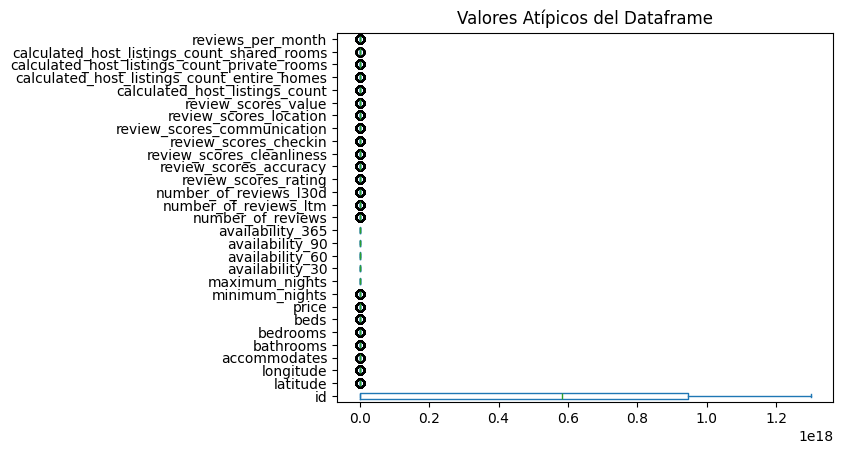

In [18]:
#realizamos diagrama de caja o bigote 
fig = plt.figure(figsize= (15, 8))
cuantitativos.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

**PROCEDIMIENTO DESVIACIÓN ESTÁNDAR PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [19]:
#Método aplicando desviación estándar. Encuentro los valores extremos
y=cuantitativos

Lim_Sup = y.mean() + 3*y.std()
Lim_Inf = y.mean() - 3*y.std()
print("Limite superioir permitido", Lim_Sup)
print("Limite inferior permitido", Lim_Inf)

Limite superioir permitido id                                              1.973955e+18
latitude                                        4.896242e+01
longitude                                      -1.227977e+02
accommodates                                    1.046584e+01
bathrooms                                       2.991948e+00
bedrooms                                        4.687835e+00
beds                                            5.998918e+00
price                                           8.068878e+02
minimum_nights                                  9.906456e+01
maximum_nights                                  1.731332e+03
availability_30                                 4.835042e+01
availability_60                                 9.808952e+01
availability_90                                 1.505318e+02
availability_365                                5.602991e+02
number_of_reviews                               3.574773e+02
number_of_reviews_ltm                           7.216037e+

In [21]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
dt2=cuantitativos[(y<=Lim_Sup)&(y>=Lim_Inf)]
dt2

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,19898,48.425150,-123.339770,1.0,1.0,1.0,2.0,188.5,2.0,30,...,5.00,5.00,5.00,4.90,4.80,1.0,0.0,1.0,0.0,1.90
1,83515,48.862220,-123.499960,2.0,1.0,1.0,0.0,175.0,2.0,730,...,4.87,4.92,4.84,4.94,4.75,2.0,2.0,0.0,0.0,0.90
2,168460,48.416200,-123.367900,3.0,2.5,2.0,2.0,200.0,60.0,180,...,4.98,4.89,4.92,5.00,4.90,1.0,1.0,0.0,0.0,0.43
3,185732,48.505890,-123.463570,5.0,1.0,2.0,2.0,199.0,1.0,365,...,4.65,4.82,4.88,4.61,4.61,3.0,0.0,3.0,0.0,0.32
4,193366,48.425740,-123.337600,6.0,2.0,2.0,3.0,135.0,30.0,365,...,4.78,4.92,4.89,4.88,4.76,1.0,1.0,0.0,0.0,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962,1297151447049091869,48.422144,-123.413810,4.0,1.0,1.0,2.0,178.0,3.0,365,...,5.00,5.00,5.00,4.90,4.80,1.0,1.0,0.0,0.0,1.90
3963,1297951442048266188,48.362235,-123.804602,4.0,1.0,1.0,2.0,242.0,1.0,365,...,5.00,5.00,5.00,4.90,4.80,2.0,2.0,0.0,0.0,1.90
3964,1298057658412712726,48.901587,-123.551720,4.0,1.0,2.0,2.0,350.0,2.0,7,...,5.00,5.00,5.00,4.90,4.80,1.0,1.0,0.0,0.0,1.90
3965,1298245712044358317,48.362159,-123.804654,4.0,1.0,1.0,2.0,242.0,1.0,365,...,5.00,5.00,5.00,4.90,4.80,2.0,2.0,0.0,0.0,1.90


In [22]:
#corroboramos valores nulos (atipicos) del nuevo dataframe 
vna=dt2.isnull().sum()
vna

id                                                0
latitude                                         11
longitude                                       137
accommodates                                     66
bathrooms                                       117
bedrooms                                         69
beds                                            100
price                                            34
minimum_nights                                   21
maximum_nights                                    0
availability_30                                   0
availability_60                                   0
availability_90                                   0
availability_365                                  0
number_of_reviews                                94
number_of_reviews_ltm                            80
number_of_reviews_l30d                          114
review_scores_rating                             70
review_scores_accuracy                           70
review_score

In [23]:
#ahora reemplazaremos valores nulos con mean (promedio) y copiamos en un nuevo dataframe 
dt_clean = dt2.copy()
dt_clean = dt_clean.fillna(round(dt2.mean(), 1))
dt_clean

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,19898,48.425150,-123.339770,1.0,1.0,1.0,2.0,188.5,2.0,30,...,5.00,5.00,5.00,4.90,4.80,1.0,0.0,1.0,0.0,1.90
1,83515,48.862220,-123.499960,2.0,1.0,1.0,0.0,175.0,2.0,730,...,4.87,4.92,4.84,4.94,4.75,2.0,2.0,0.0,0.0,0.90
2,168460,48.416200,-123.367900,3.0,2.5,2.0,2.0,200.0,60.0,180,...,4.98,4.89,4.92,5.00,4.90,1.0,1.0,0.0,0.0,0.43
3,185732,48.505890,-123.463570,5.0,1.0,2.0,2.0,199.0,1.0,365,...,4.65,4.82,4.88,4.61,4.61,3.0,0.0,3.0,0.0,0.32
4,193366,48.425740,-123.337600,6.0,2.0,2.0,3.0,135.0,30.0,365,...,4.78,4.92,4.89,4.88,4.76,1.0,1.0,0.0,0.0,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962,1297151447049091869,48.422144,-123.413810,4.0,1.0,1.0,2.0,178.0,3.0,365,...,5.00,5.00,5.00,4.90,4.80,1.0,1.0,0.0,0.0,1.90
3963,1297951442048266188,48.362235,-123.804602,4.0,1.0,1.0,2.0,242.0,1.0,365,...,5.00,5.00,5.00,4.90,4.80,2.0,2.0,0.0,0.0,1.90
3964,1298057658412712726,48.901587,-123.551720,4.0,1.0,2.0,2.0,350.0,2.0,7,...,5.00,5.00,5.00,4.90,4.80,1.0,1.0,0.0,0.0,1.90
3965,1298245712044358317,48.362159,-123.804654,4.0,1.0,1.0,2.0,242.0,1.0,365,...,5.00,5.00,5.00,4.90,4.80,2.0,2.0,0.0,0.0,1.90


In [24]:
#corroboramos valores nulos del dataframe limpio 
vna = dt_clean.isnull().sum()
vna

id                                              0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
review_scores_rating                            0
review_scores_accuracy                          0
review_scores_cleanliness                       0


**PROCEDIMIENTO CON CUANTILES PARA SUSTITUIR OUTLIERS EN EL DATAFRAME**

In [25]:
#comenzamos método aplicando cuartiles. zPara ello encuentro 0.25 y 0.75
y=cuantitativos

percentiles25=y.quantile(0.25) #Q1
percentiles75=y.quantile(0.75) #Q3
iqr= percentiles75 - percentiles25

Lim_Sup_iqr= percentiles75 + 1.5*iqr
Lim_Inf_iqr = percentiles25 - 1.5*iqr
print("Limite superior permitido", Lim_Sup_iqr)
print("Limite inferior permitido", Lim_Inf_iqr)

Limite superior permitido id                                              2.367964e+18
latitude                                        4.874870e+01
longitude                                      -1.231333e+02
accommodates                                    9.500000e+00
bathrooms                                       1.000000e+00
bedrooms                                        3.500000e+00
beds                                            3.500000e+00
price                                           3.300000e+02
minimum_nights                                  1.600000e+01
maximum_nights                                  2.453500e+03
availability_30                                 6.250000e+01
availability_60                                 1.287500e+02
availability_90                                 1.955000e+02
availability_365                                6.492500e+02
number_of_reviews                               1.900000e+02
number_of_reviews_ltm                           5.250000e+0

In [26]:
#obtenemos los datos limpios del Dataframe 
dt3_iqr=cuantitativos[(y<=Lim_Sup_iqr)&(y>=Lim_Inf_iqr)]
dt3_iqr

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,19898,48.425150,-123.339770,1.0,1.0,1.0,2.0,188.5,2.0,30,...,5.00,5.00,5.00,4.90,4.80,1.0,0.0,NaN,0.0,1.90
1,83515,NaN,-123.499960,2.0,1.0,1.0,0.0,175.0,2.0,730,...,4.87,4.92,4.84,4.94,4.75,2.0,2.0,0.0,0.0,0.90
2,168460,48.416200,-123.367900,3.0,NaN,2.0,2.0,200.0,NaN,180,...,4.98,4.89,4.92,5.00,4.90,1.0,1.0,0.0,0.0,0.43
3,185732,48.505890,-123.463570,5.0,1.0,2.0,2.0,199.0,1.0,365,...,4.65,4.82,4.88,NaN,4.61,3.0,0.0,NaN,0.0,0.32
4,193366,48.425740,-123.337600,6.0,NaN,2.0,3.0,135.0,NaN,365,...,4.78,4.92,4.89,4.88,4.76,1.0,1.0,0.0,0.0,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962,1297151447049091869,48.422144,-123.413810,4.0,1.0,1.0,2.0,178.0,3.0,365,...,5.00,5.00,5.00,4.90,4.80,1.0,1.0,0.0,0.0,1.90
3963,1297951442048266188,48.362235,NaN,4.0,1.0,1.0,2.0,242.0,1.0,365,...,5.00,5.00,5.00,4.90,4.80,2.0,2.0,0.0,0.0,1.90
3964,1298057658412712726,NaN,-123.551720,4.0,1.0,2.0,2.0,NaN,2.0,7,...,5.00,5.00,5.00,4.90,4.80,1.0,1.0,0.0,0.0,1.90
3965,1298245712044358317,48.362159,NaN,4.0,1.0,1.0,2.0,242.0,1.0,365,...,5.00,5.00,5.00,4.90,4.80,2.0,2.0,0.0,0.0,1.90


In [27]:
#corroboramos valores 
vna=dt3_iqr.isnull().sum()
vna

id                                                0
latitude                                        560
longitude                                       337
accommodates                                    119
bathrooms                                       846
bedrooms                                        211
beds                                            430
price                                           343
minimum_nights                                  893
maximum_nights                                    0
availability_30                                   0
availability_60                                   0
availability_90                                   0
availability_365                                  0
number_of_reviews                               328
number_of_reviews_ltm                           215
number_of_reviews_l30d                          343
review_scores_rating                            261
review_scores_accuracy                          317
review_score

In [28]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean" y realizamos una copia del dataframe 
dt4_iqr = dt3_iqr.copy()
dt4_iqr = dt4_iqr.fillna(round(dt3_iqr.mean(),1))
dt4_iqr

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,19898,48.425150,-123.339770,1.0,1.0,1.0,2.0,188.5,2.0,30,...,5.00,5.00,5.00,4.90,4.80,1.0,0.0,0.0,0.0,1.90
1,83515,48.500000,-123.499960,2.0,1.0,1.0,0.0,175.0,2.0,730,...,4.87,4.92,4.84,4.94,4.75,2.0,2.0,0.0,0.0,0.90
2,168460,48.416200,-123.367900,3.0,1.0,2.0,2.0,200.0,2.2,180,...,4.98,4.89,4.92,5.00,4.90,1.0,1.0,0.0,0.0,0.43
3,185732,48.505890,-123.463570,5.0,1.0,2.0,2.0,199.0,1.0,365,...,4.65,4.82,4.88,4.90,4.61,3.0,0.0,0.0,0.0,0.32
4,193366,48.425740,-123.337600,6.0,1.0,2.0,3.0,135.0,2.2,365,...,4.78,4.92,4.89,4.88,4.76,1.0,1.0,0.0,0.0,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962,1297151447049091869,48.422144,-123.413810,4.0,1.0,1.0,2.0,178.0,3.0,365,...,5.00,5.00,5.00,4.90,4.80,1.0,1.0,0.0,0.0,1.90
3963,1297951442048266188,48.362235,-123.400000,4.0,1.0,1.0,2.0,242.0,1.0,365,...,5.00,5.00,5.00,4.90,4.80,2.0,2.0,0.0,0.0,1.90
3964,1298057658412712726,48.500000,-123.551720,4.0,1.0,2.0,2.0,155.5,2.0,7,...,5.00,5.00,5.00,4.90,4.80,1.0,1.0,0.0,0.0,1.90
3965,1298245712044358317,48.362159,-123.400000,4.0,1.0,1.0,2.0,242.0,1.0,365,...,5.00,5.00,5.00,4.90,4.80,2.0,2.0,0.0,0.0,1.90


In [29]:
#unimos el dataframe cuantitativo limpio con el dataframe cualitativo 
Dlimpio = pd.concat([cualitativos, dt4_iqr], axis=1)
Dlimpio

,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/19898,Duchess Suite,No se proporciona descripción,No se proporcionan detalles,https://a0.muscache.com/pictures/101822/ae950f...,Ryan,2010-01-11,Desconocido,-%,f,...,5.00,5.00,5.00,4.90,4.80,1.0,0.0,0.0,0.0,1.90
1,https://www.airbnb.com/rooms/83515,GALLERY B&B SUITE,A quiet and sunny suite with a private entranc...,"Our property has gardens, an orchard, a pond a...",https://a0.muscache.com/pictures/6110737/930db...,Celia,2011-03-21,within an hour,100%,t,...,4.87,4.92,4.84,4.94,4.75,2.0,2.0,0.0,0.0,0.90
2,https://www.airbnb.com/rooms/168460,Perfectly located lovely home,"Wonderful neighborhood, two blocks to inner ha...",Lovely neighborhood with friendly neighbors su...,https://a0.muscache.com/pictures/7a2bfc51-fd59...,Deborah,2011-07-10,Desconocido,-%,f,...,4.98,4.89,4.92,5.00,4.90,1.0,1.0,0.0,0.0,0.43
3,https://www.airbnb.com/rooms/185732,Romantic 2 bedroom private suite,The unit is a 2 bedroom suite sectioned off fr...,No se proporcionan detalles,https://a0.muscache.com/pictures/20829630/9356...,Peter,2011-07-27,a few days or more,10%,f,...,4.65,4.82,4.88,4.90,4.61,3.0,0.0,0.0,0.0,0.32
4,https://www.airbnb.com/rooms/193366,Tudor Cottage,"In the historic Rockland area of Victoria, thi...",We are surrounded by heritage homes with lovel...,https://a0.muscache.com/pictures/6145514/1eb8d...,Sandra,2011-08-07,within a few hours,75%,f,...,4.78,4.92,4.89,4.88,4.76,1.0,1.0,0.0,0.0,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962,https://www.airbnb.com/rooms/1297151447049091869,Beach getaway,Your family will be close to everything when y...,No se proporcionan detalles,https://a0.muscache.com/pictures/hosting/Hosti...,Rachel,2016-06-12,within an hour,100%,f,...,5.00,5.00,5.00,4.90,4.80,1.0,1.0,0.0,0.0,1.90
3963,https://www.airbnb.com/rooms/1297951442048266188,Elora Oceanside Retreat - Side A,"Welcome to Elora Oceanside Retreat, A blend of...",No se proporcionan detalles,https://a0.muscache.com/pictures/miso/Hosting-...,Daniel Bryan,2015-08-03,Desconocido,-%,f,...,5.00,5.00,5.00,4.90,4.80,2.0,2.0,0.0,0.0,1.90
3964,https://www.airbnb.com/rooms/1298057658412712726,Lakeside Cottage,Kick back and relax in this tranquil retreat o...,No se proporcionan detalles,https://a0.muscache.com/pictures/miso/Hosting-...,Melanie,2024-11-25,Desconocido,-%,f,...,5.00,5.00,5.00,4.90,4.80,1.0,1.0,0.0,0.0,1.90
3965,https://www.airbnb.com/rooms/1298245712044358317,Elora Oceanside Retreat - Side B,"Welcome to Elora Oceanside Retreat, A blend of...",No se proporcionan detalles,https://a0.muscache.com/pictures/miso/Hosting-...,Daniel Bryan,2015-08-03,Desconocido,-%,f,...,5.00,5.00,5.00,4.90,4.80,2.0,2.0,0.0,0.0,1.90


In [30]:
#corroboramos que los datos hayan sido reemplazados 
vna=Dlimpio.isnull().sum()
vna

listing_url                                     0
name                                            0
description                                     0
neighborhood_overview                           0
picture_url                                     0
host_name                                       0
host_since                                      0
host_response_time                              0
host_response_rate                              0
host_is_superhost                               0
host_identity_verified                          0
neighbourhood                                   0
neighbourhood_cleansed                          0
property_type                                   0
room_type                                       0
bathrooms_text                                  0
amenities                                       0
has_availability                                0
first_review                                    0
last_review                                     0


**CONVERSIÓN DE DATAFRAME A CSV**

In [31]:
Dlimpio.to_csv("Victoria_limpio.csv")